<a href="https://colab.research.google.com/github/UMassIonTrappers/quantum-computing-labs/blob/main/labs/Lab_07_Quantum_circuits_quantum_adder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 550/650 QC

## Introduction to Quantum Computing

Robert Niffenegger (rniffenegger@umass.edu )

In [1]:
try:
  import qutip
  print('Qutip imported')
except ImportError:
  print('Install Qutip')
  !pip install --quiet qutip
  '''New library from Qutip https://arxiv.org/pdf/2105.09902v2.pdf '''
  !pip install --quiet qutip-qip

try:
  import qiskit
  print('Qiskit imported')
except ImportError:
  print('Install Qiskit')
  !pip install --quiet qiskit
  !pip install --quiet qiskit[visualization]
  # !pip install --quiet git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

try:
  from qiskit_aer import QasmSimulator
  print('Qiskit Aer imported');
except ImportError:
  print('Install Qiskit-Aer')
  !pip install --quiet qiskit-aer

try:
  from qiskit_ibm_runtime import QiskitRuntimeService
except ImportError:
  print('Install Qiskit-IBM-Runtime')
  !pip install --quiet qiskit-ibm-runtime


# !pip install --quiet qiskit_ibm_provider[visualization]

# !pip install --quiet graphviz
# !apt-get install graphviz

Qutip imported
Qiskit imported
Qiskit Aer imported


### Initialize

In [2]:
%matplotlib inline
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, sin, cos

#Plot setup
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#QuTiP imports
import qutip as qt
from qutip import *

#QUTIP QIP
from qutip.qip import *
from qutip_qip.circuit import QubitCircuit
from qutip_qip.operations import Gate
from qutip_qip.qasm import circuit_to_qasm_str


#Qisket imports
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
from qiskit_aer import QasmSimulator
from qiskit.quantum_info import Statevector

from qiskit.visualization import plot_error_map, plot_coupling_map

from qiskit.transpiler import CouplingMap

# To plot the error maps (add to path after install via executable!)
from graphviz import Graph 


'''
In Jupyter Notebooks we can display this nicely using Latex.
'''
from qiskit.visualization import array_to_latex

from scipy import constants

# LAB 7 - Advanced Quantum Circuits and the Quantum Adder

For this lab we will be following Thomas Wong's textbook.

It is available for free as a pdf here:
* http://www.thomaswong.net/
* http://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e2p.pdf

We will focus on 4.5 and 5.2.4 which cover the Quantum Adder

First please review the classical portion of the book on classical digital adders  ( 1.3 Adders )

That section goes over how to construct a digital binary adder with logical gates.


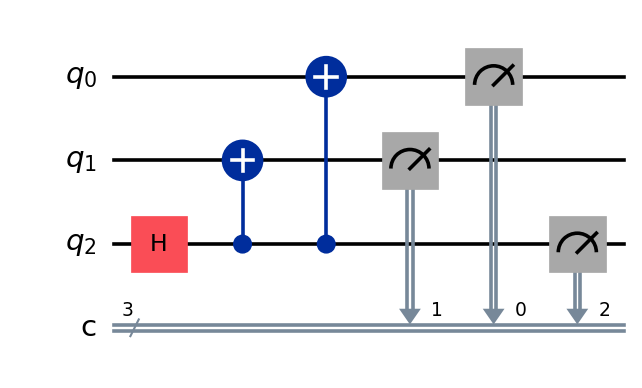

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3,'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# circuit = QuantumCircuit(3, 3)
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])


circuit.draw('mpl', scale = 1.3)

# Advanced Quantum Circuits


https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html

#Define a custom quantum gate

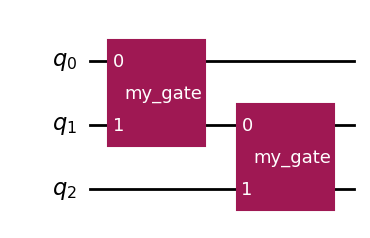

In [4]:
from qiskit.circuit import Gate

'''
Custom gate
'''
my_gate = Gate(name='my_gate', num_qubits=2, params=[])

qr = QuantumRegister(3, 'q')

circ = QuantumCircuit(qr)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw('mpl')

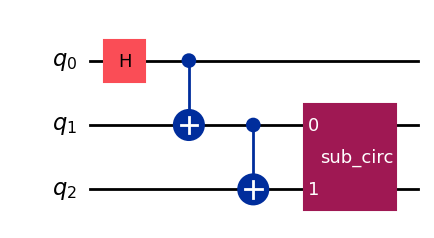

In [5]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.id(sub_q[1])
sub_circ.u(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw('mpl')

# QASM

We have used QASM to convert from Qutip gates to Qiskit gates before

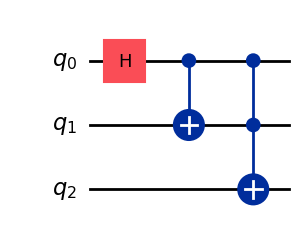

In [65]:
'''
QUTIP circuit
'''
qc = QubitCircuit(3)
qc.add_gate("SNOT", 0)
qc.add_gate("CNOT", 1, 0)
qc.add_gate("TOFFOLI", targets=2, controls=[0,1])

#Convert to QASM
qasmstr = circuit_to_qasm_str(qc)

#Draw using Qiskit
qkqc = QuantumCircuit.from_qasm_str(qasmstr)#Import to Qisket
qkqc.draw('mpl')# Draw with QISKET

In [66]:
print(qasmstr)

// QASM 2.0 file generated by QuTiP

OPENQASM 2.0;
include "qelib1.inc";

qreg q[3];

h q[0];
cx q[0],q[1];
ccx q[0],q[1],q[2];



## Define qiskit gates using QASM string

Note how TRIPLE quotes are used to define a multi-line string

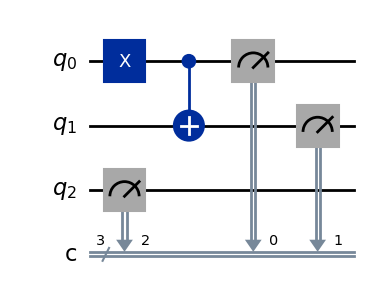

In [9]:
qasmstr = """
OPENQASM 2.0;
// Define the Pauli X gate.
gate x a
{
U(pi,0,pi) a;
}
qreg q[3];
creg c[3];
x q[0];
CX q[0], q[1];
measure q -> c;
"""

#Import to Qisket
qkqc = QuantumCircuit.from_qasm_str(qasmstr)
qkqc.draw('mpl')

# Quantum Sum

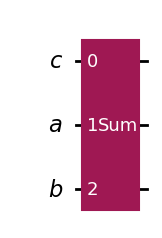

In [10]:
qasmstr = """
OPENQASM 2.0;
// Include standard gates from IBM Quantum Experience.
include "qelib1.inc";
// Define the quantum sum gate.
gate sum cin, a, b
{
cx a, b;
cx cin, b;
}
// Declare the quantum registers.
qreg c[1];
qreg a[1];
qreg b[1];
// Add the numbers so that |a>|b> becomes |a>|a+b>.
sum c[0], a[0], b[0];
"""

#Import to Qisket
qkqc = QuantumCircuit.from_qasm_str(qasmstr)
qkqc.draw('mpl')

## Decompose circuit into bare CNOT gates then draw

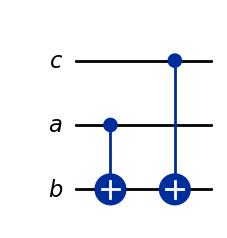

In [11]:
decomposed_circ = qkqc.decompose()
decomposed_circ.draw('mpl')

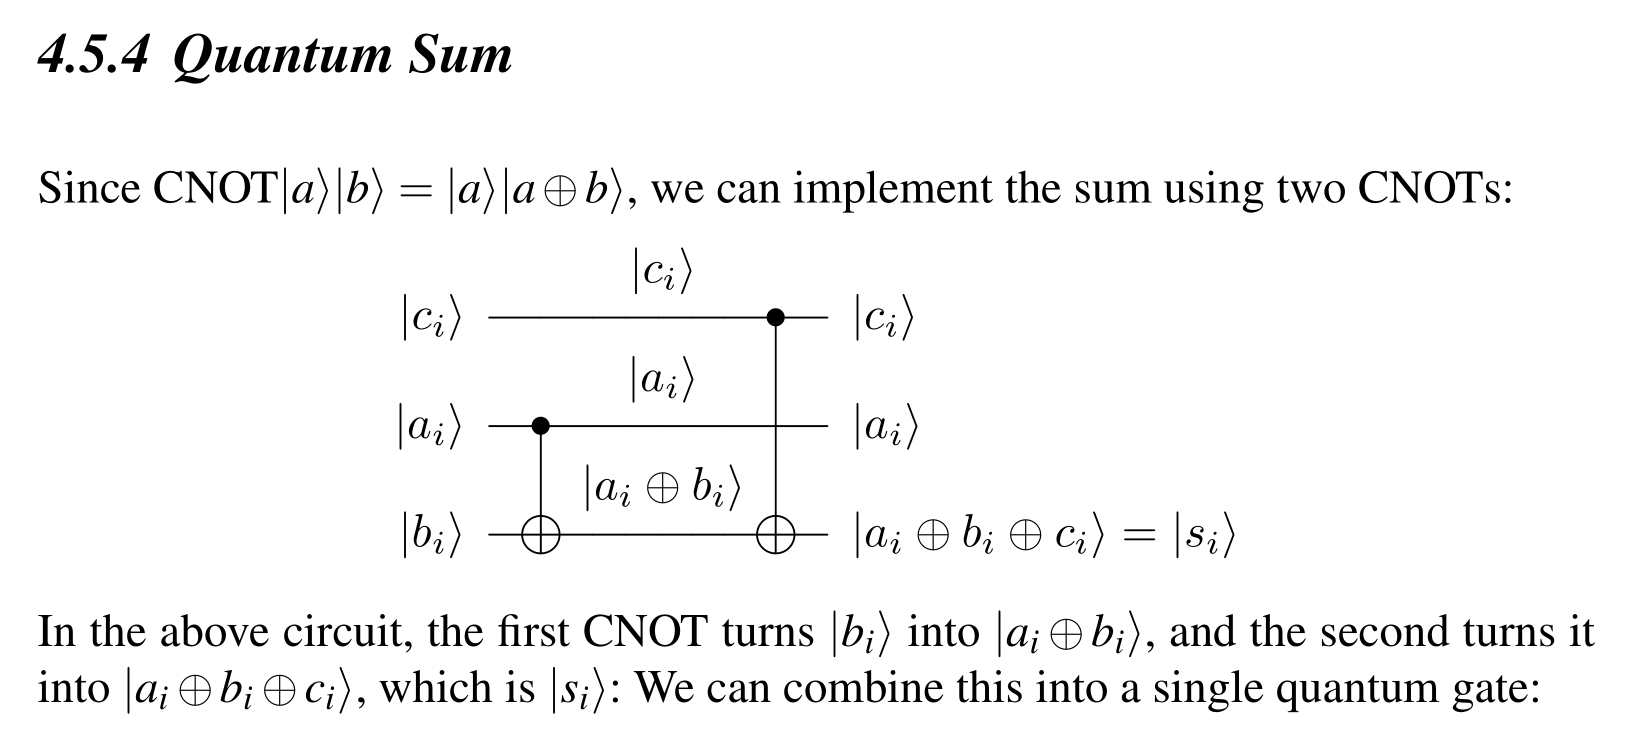

# Quantum Sum with Carry

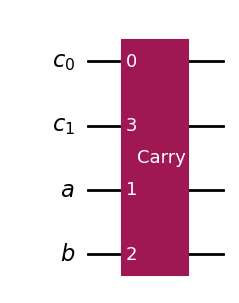

In [13]:
qasmstr = """
OPENQASM 2.0;
// Include standard gates from IBM Quantum Experience.
include "qelib1.inc";
// Define the quantum carry gate.
gate carry cin, a, b, cout
{
ccx a, b, cout;
cx a, b;
ccx cin, b, cout;
}
// Declare the quantum registers.
qreg c[2];
qreg a[1];
qreg b[1];
// Add the numbers so that |a>|b> becomes |a>|a+b>.
carry c[0], a[0], b[0], c[1];
"""

#Import to Qisket
qkqc = QuantumCircuit.from_qasm_str(qasmstr)
qkqc.draw('mpl')

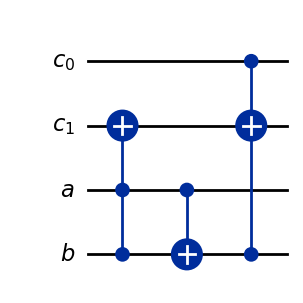

In [14]:
decomposed_circ = qkqc.decompose()
decomposed_circ.draw('mpl')

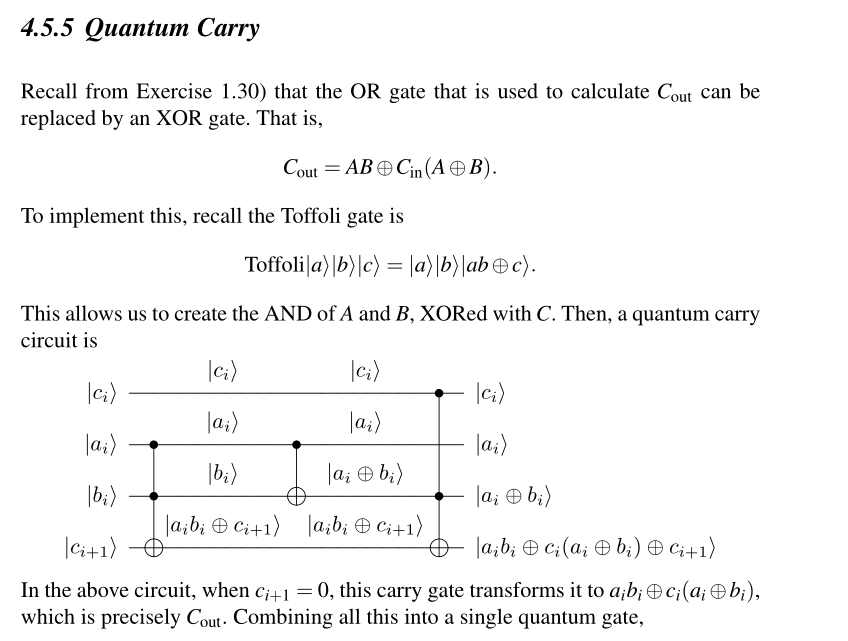

# Full Quantum Ripple Adder

Let's add the numbers a = 14 and b = 11


In [15]:
'''
Remind ourselves of useful python functions for conversion
'''

a = 14
binarystring = format(a,"b")
print(binarystring)
print(int(binarystring,2))

b = 11
binarystring = format(b,"b")
print(binarystring)
print(int(binarystring,2))


1110
14
1011
11


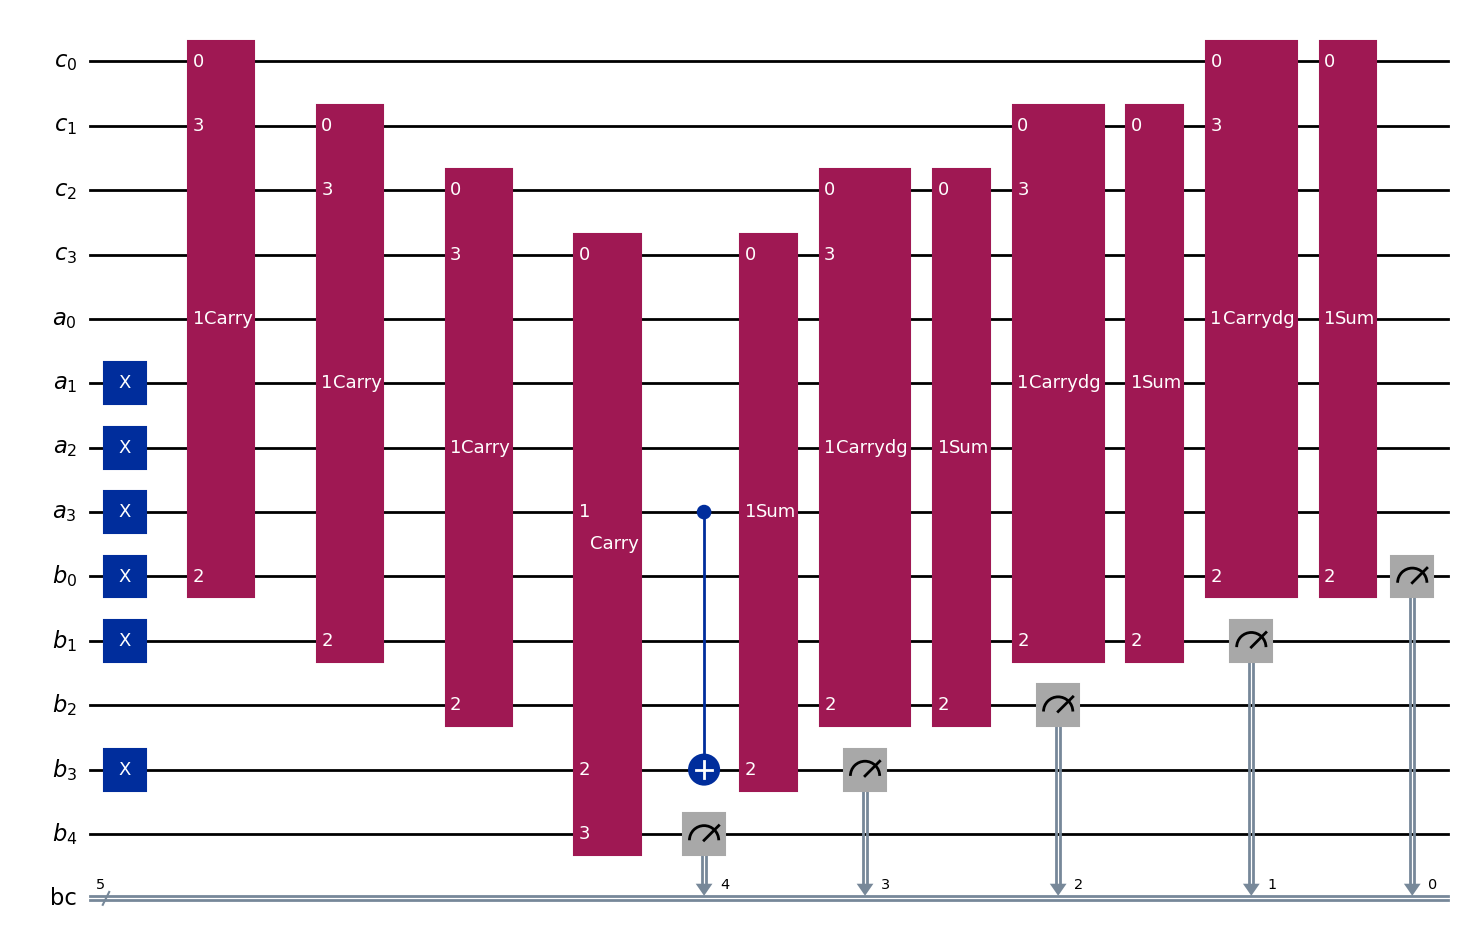

In [16]:
qasmstr = """
OPENQASM 2.0;
// Include standard gates from IBM Quantum Experience.
include "qelib1.inc";
// Define the quantum sum gate.
gate sum cin, a, b
{
cx a, b;
cx cin, b;
}
// Define the quantum carry gate.
gate carry cin, a, b, cout
{
ccx a, b, cout;
cx a, b;
ccx cin, b, cout;
}
// Define the inverse of the quantum carry gate.
gate carrydg cin, a, b, cout
{
ccx cin, b, cout;
cx a, b;
ccx a, b, cout;
}
// Declare the quantum registers.
qreg c[4];
qreg a[4];
qreg b[5];
// Declare the classical registers.
creg bc[5];
//
// Set the input states by applying X gates.
//
x a[1];
x a[2];
x a[3];
// a = 1110
x b[0];
x b[1];
x b[3];
// b = 1011
// Add the numbers so that |a>|b> becomes |a>|a+b>.
carry c[0], a[0], b[0], c[1];
carry c[1], a[1], b[1], c[2];
carry c[2], a[2], b[2], c[3];
carry c[3], a[3], b[3], b[4];
cx a[3], b[3];
sum c[3], a[3], b[3];
carrydg c[2], a[2], b[2], c[3];
sum c[2], a[2], b[2];
carrydg c[1], a[1], b[1], c[2];
sum c[1], a[1], b[1];
carrydg c[0], a[0], b[0], c[1];
sum c[0], a[0], b[0];
// Measure the sum and put it in the classical register.
measure b -> bc;
"""

#Import to Qisket
qc = QuantumCircuit.from_qasm_str(qasmstr)
qc.draw('mpl')


Decompose the circuit one layer into the Toffoli (Control-Control-Not gates) and the CNOT gates.


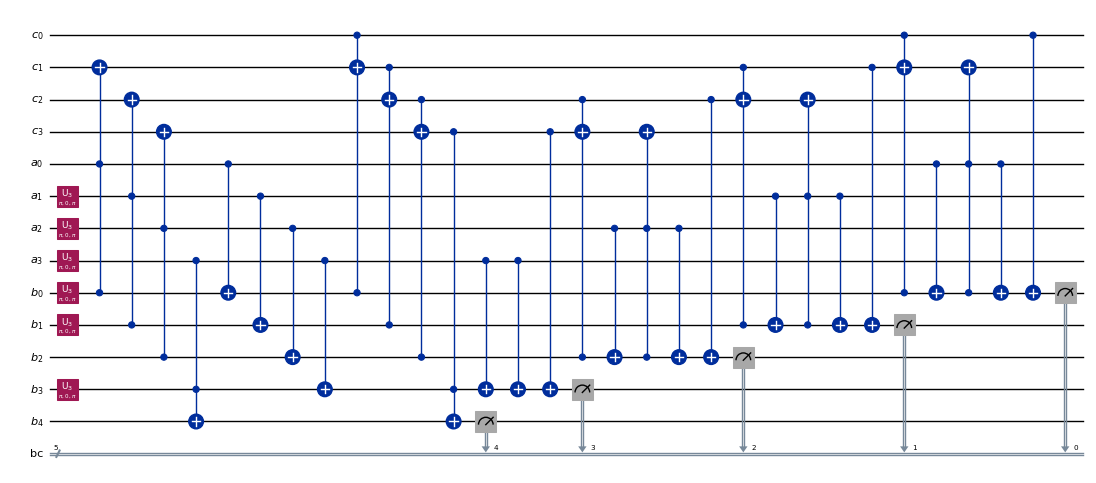

In [18]:
decomposed_circ = qc.decompose() # Does not modify original circuit
decomposed_circ.draw('mpl', scale = 0.5, fold = 50)

Decompose another layer, breaking the Toffoli gates into CNOT gates for running on a superconducting system.

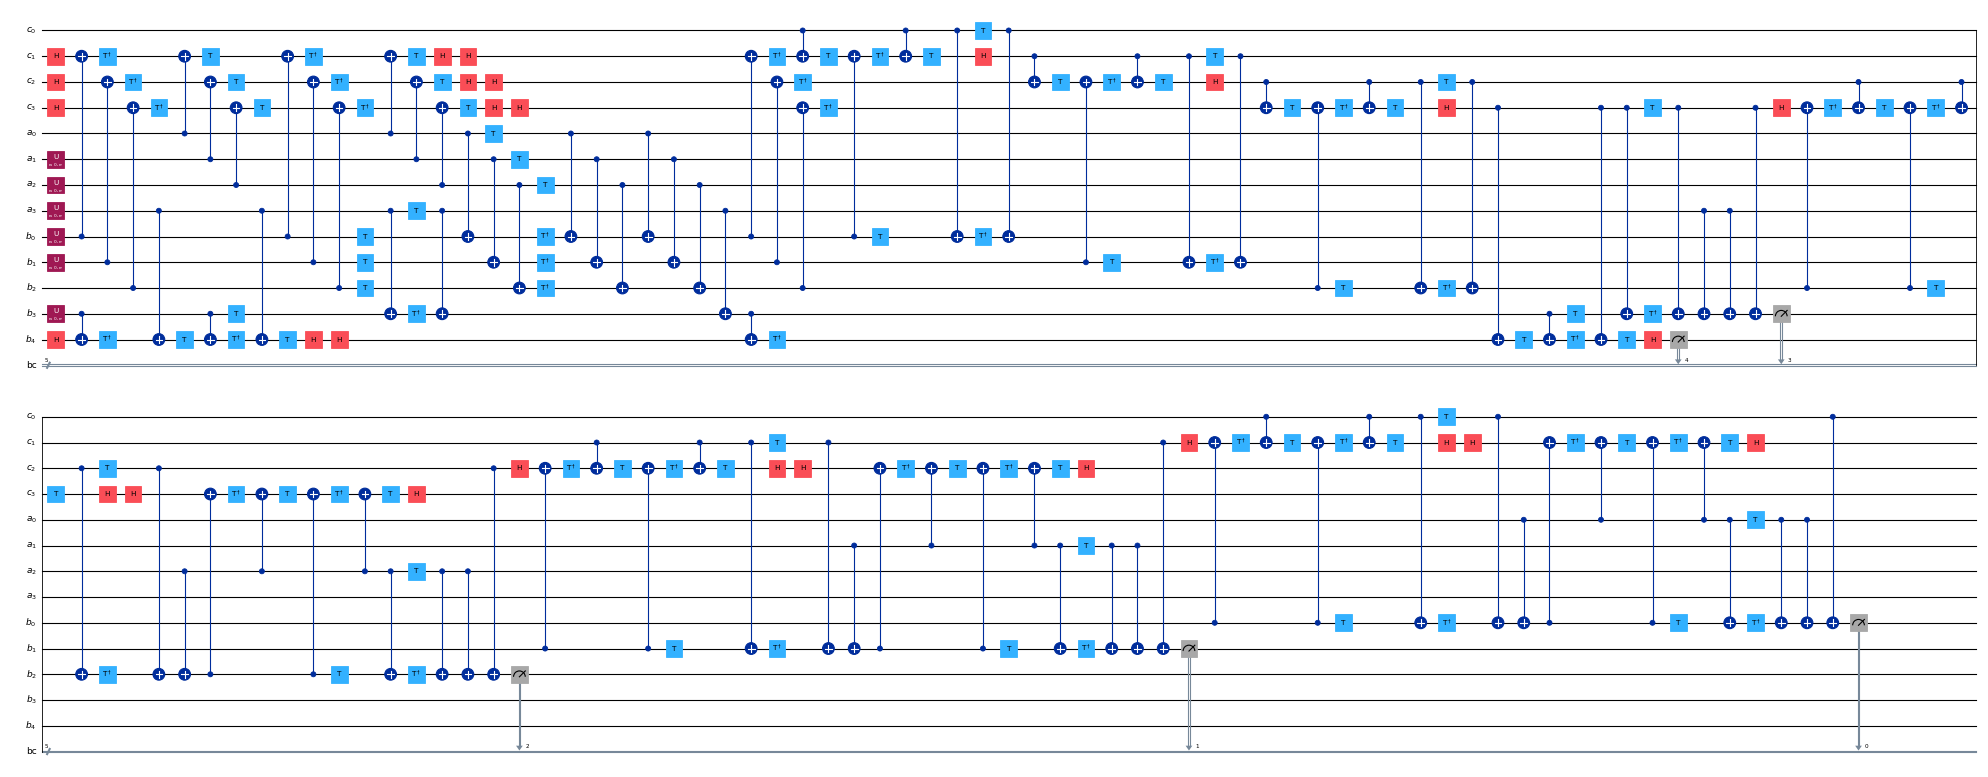

In [24]:
decomposed_circ_full = decomposed_circ.decompose()
decomposed_circ_full.draw('mpl' , scale = 0.4, fold = 75)

In [25]:
'''
Calculate the depth of the quantum circuit
'''
decomposed_circ_full.depth()

119

# Quantum Transpiling

More details on transpiling here: https://qiskit.org/documentation/apidoc/transpiler.html

https://arxiv.org/abs/2102.01682


## Over 100 gates just to add two 5 bit numbers!


# Unitary Simulator (AerSimulator)

Now we can simulate the circuit with a unitary simulator. 

We shouldn't see anything *interesting*, as there is no superposition or entanglement in our circuit.

https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html

In [40]:
from qiskit_aer import AerSimulator

qc = QuantumCircuit.from_qasm_str(qasmstr)
qc.save_statevector() #just simulate the statevector

simulator = AerSimulator()
circ = transpile(qc, simulator)

job = simulator.run(decomposed_circ, shots=1000)

{'11001': 1000}


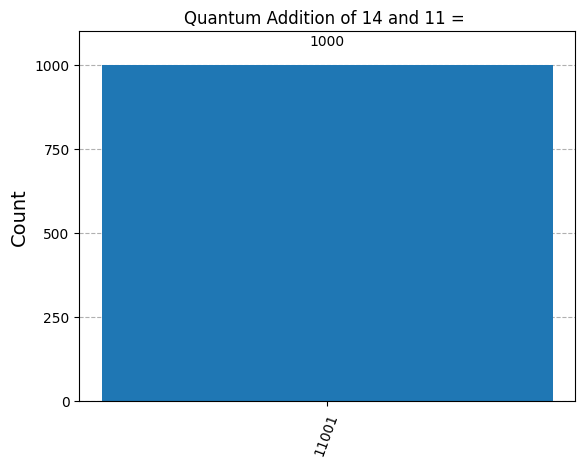

In [44]:
'''Plot results'''
counts = job.result().get_counts()
print(counts)
plot_histogram(counts , title='Quantum Addition of 14 and 11 = ')

In [54]:
print('a=',a,'b=',b )
binarystring = format(25,"b")
print('a+b in binary = ',binarystring)
print('a+b =',int(binarystring,2))

a= 14 b= 11
a+b in binary =  11001
a+b = 25


### Quantum computing* success!

14 + 11 = 25

(simulated statevector*)

# Running on the cloud

Next we will sign up to access IBM's quantum computers on the cloud.

It is free to register and doesn't take too long.

https://quantum-computing.ibm.com/login


Once you've registered you can use your unique API token to access their hardware and simulators via the cloud.


In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import GroverOperator, Diagonal
from qiskit.circuit.library import RealAmplitudes

from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.visualization import plot_histogram

# Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Batch, SamplerV2 as Sampler

In [4]:
token = "INSERT YOUR TOKEN HERE"

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum", # `channel` distinguishes between different account types
  overwrite=True,
  set_as_default=True
)

# Find a Quantum Computer to run circuit on

In [6]:
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
print(backend)

<IBMBackend('ibm_sherbrooke')>


In [ ]:
# backend = service.backend('ibm_sherbrooke') # You can also specify which QPU to use...but the wait could be hours...
# backend = service.backend('ibm_brisbane')


In [7]:
print(backend)

<IBMBackend('ibm_sherbrooke')>


# Can we run the circuit directly on the quantum computer???

In [127]:
qc = QuantumCircuit.from_qasm_str(qasmstr)

sampler = Sampler(backend)
job = sampler.run([qc])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

IBMInputValueError: 'The instruction carry on qubits (0, 4, 8, 1) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'

# No. The quantum circuit doesn't run directly without transpiling to hardware...

In [60]:
# List two-qubit gates to count in circuits as proxy for depth
twoQ_gates = set(['ecr', 'cz', 'cx'])
for gate in backend.basis_gates:
    if gate in twoQ_gates:
        twoQ_gate = gate

In [61]:
qc = QuantumCircuit.from_qasm_str(qasmstr) #create circuit from QASM
transpiled_circuit = transpile(qc, backend)
optimization_level = 0
print(f"Two-qubit gates: ", transpiled_circuit.count_ops()[twoQ_gate])

Two-qubit gates:  159


In [63]:
qc = QuantumCircuit.from_qasm_str(qasmstr) #create circuit from QASM

# initial_layout = [103,104,105,106,107,108,112,126,125,124,123,122,111] #you can specify the qubits to use
initial_layout = []

optimization_level = 0 # The level of optimization for the transpiler 

pass_manager = generate_preset_pass_manager(
    optimization_level, backend=backend, seed_transpiler=0, initial_layout=initial_layout
)

transpiled_circ = pass_manager.run(qc)
 
print(f"Two-qubit gates (optimization_level={optimization_level}): ", transpiled_circ.count_ops()[twoQ_gate])

# transpiled_circ.draw("mpl", idle_wires=False, fold=40, scale=0.5)

Two-qubit gates (optimization_level=0):  313


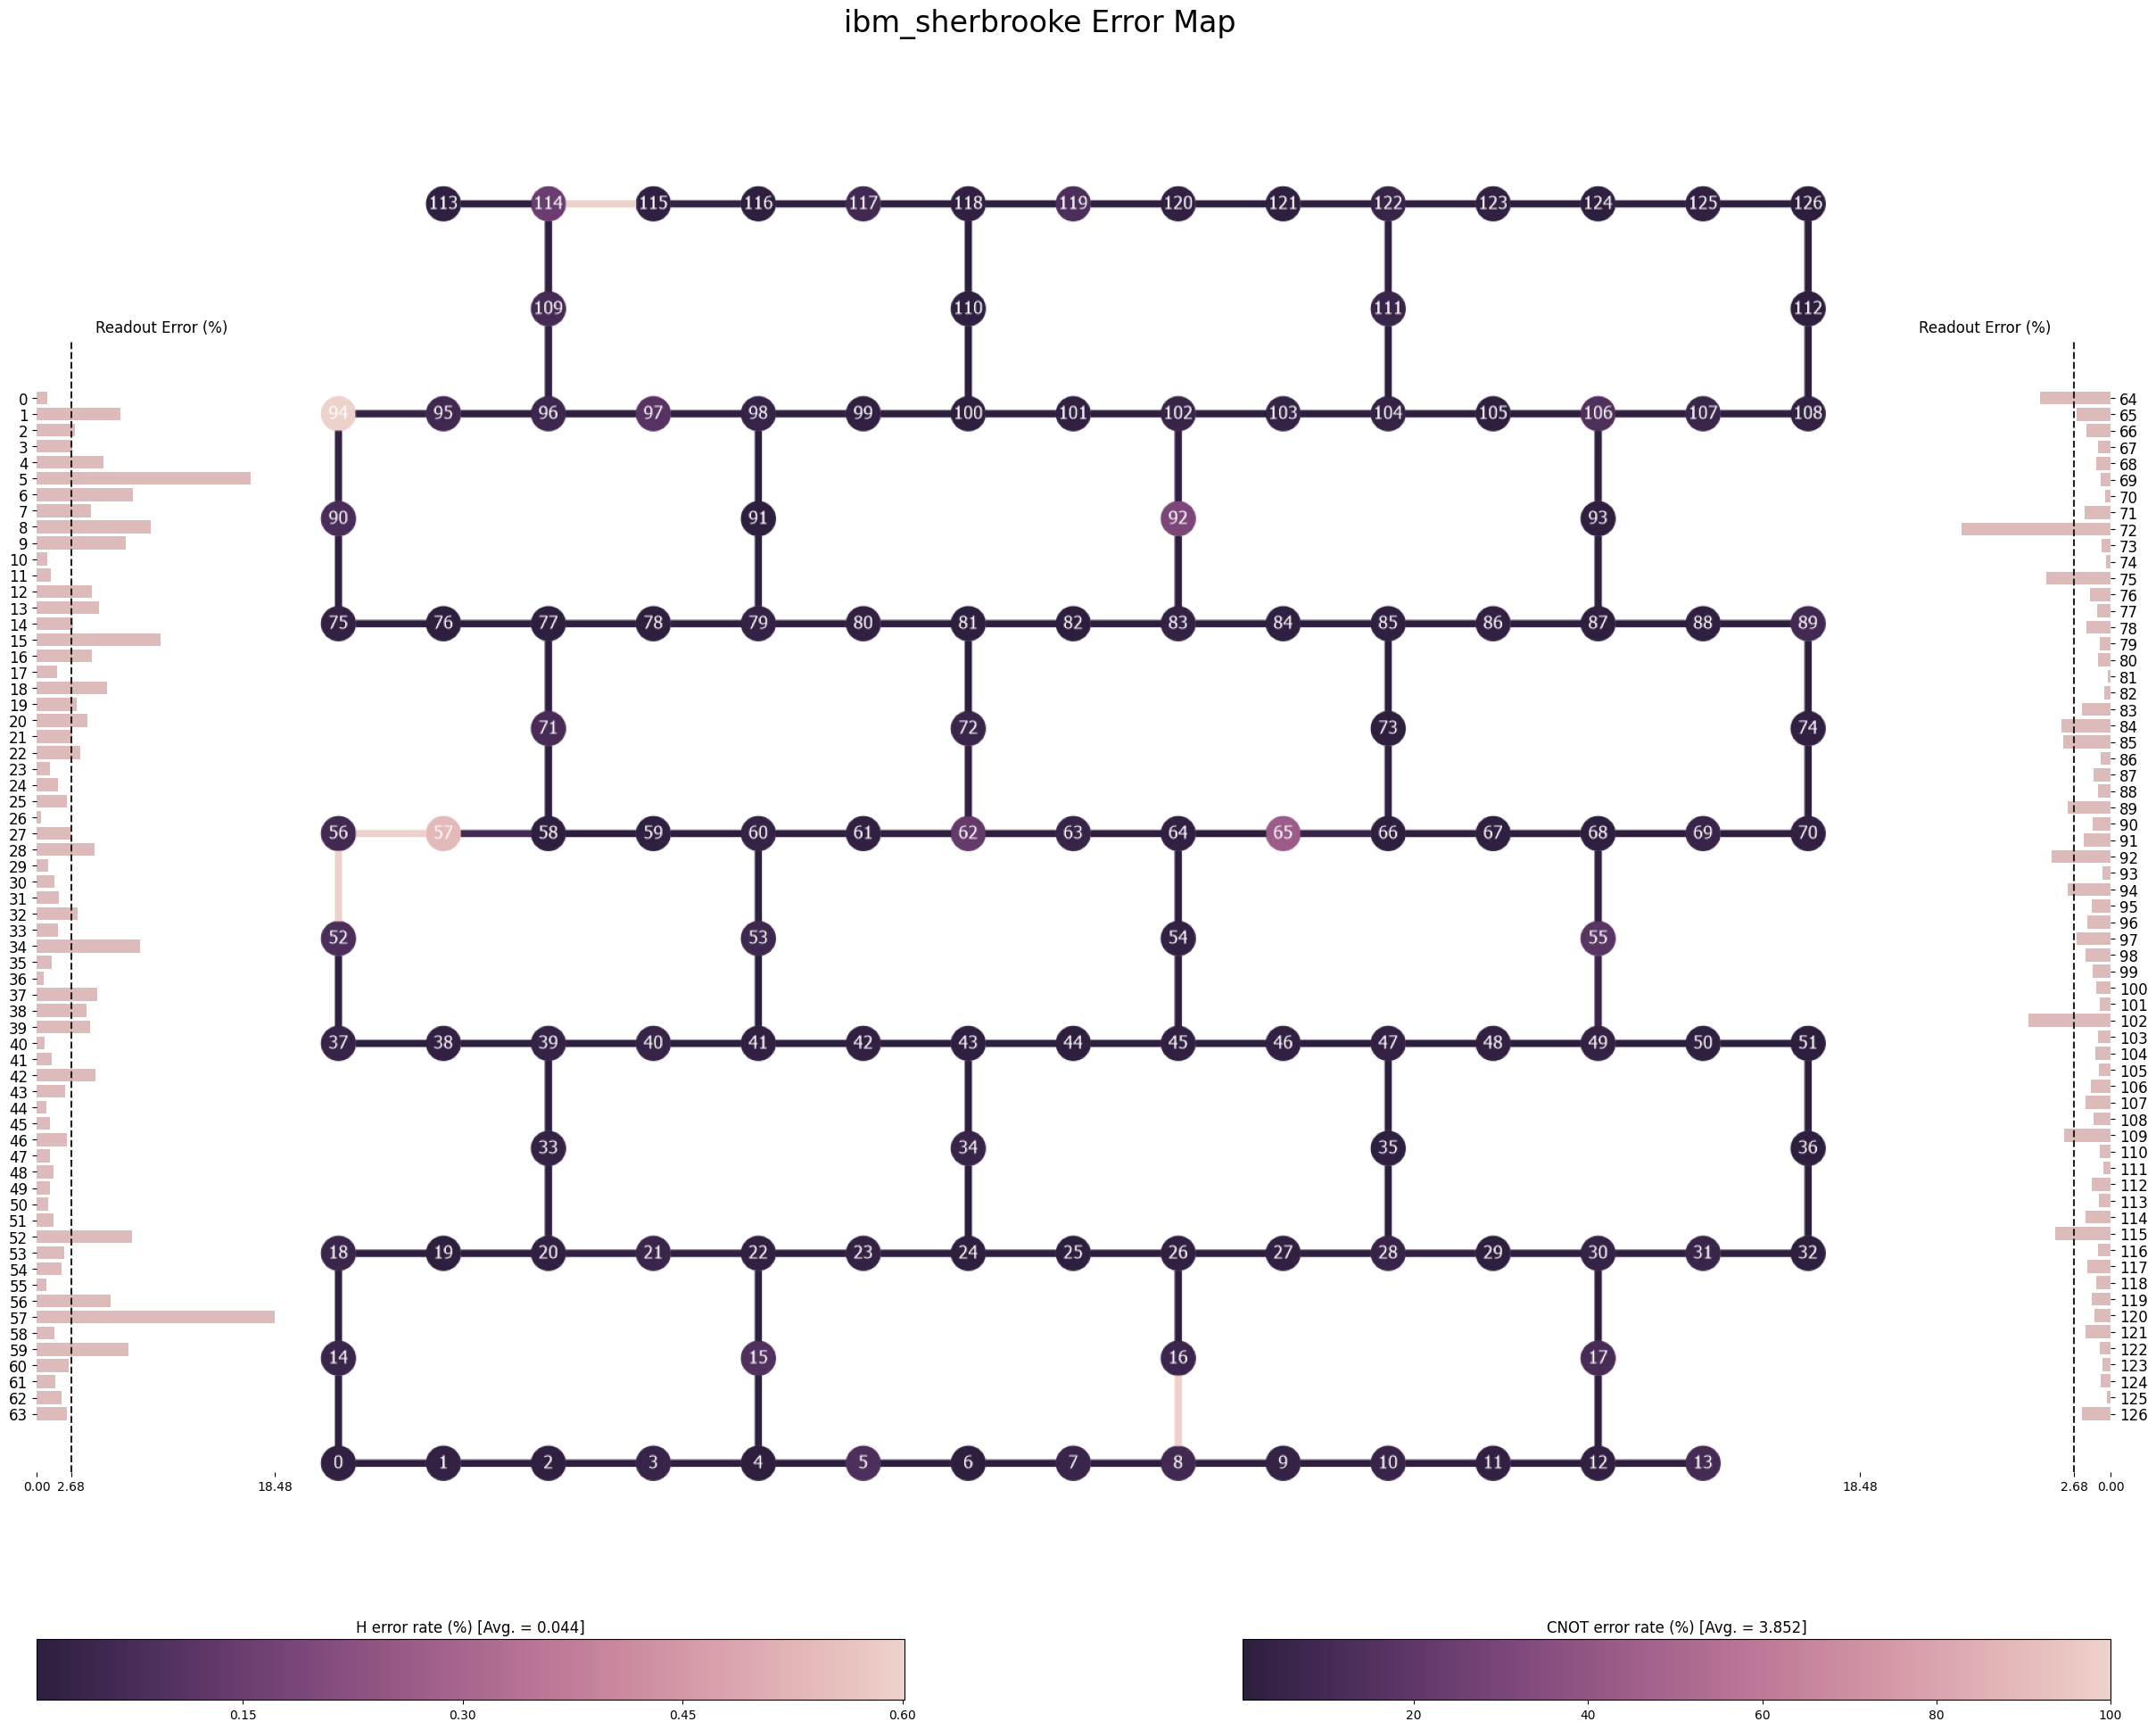

In [8]:
from qiskit.visualization import plot_error_map
 
plot_error_map(backend, figsize=(30, 24))

## Now that we've transpiled we can run on quantum computer

In [64]:
# Define Sampler
sampler = Sampler(mode=backend)
 
# Run calculation
job = sampler.run([transpiled_circuit], shots=1000)
counts = job.result()[0].data.bc.get_counts()

{'01011': 22, '00100': 47, '10000': 48, '01100': 49, '10110': 34, '01101': 18, '10101': 31, '00001': 21, '10010': 40, '00000': 40, '01010': 42, '00011': 25, '11110': 48, '01001': 20, '00111': 25, '01111': 28, '10001': 21, '11000': 43, '10111': 17, '11101': 21, '01000': 44, '00101': 31, '11111': 18, '00010': 32, '11100': 52, '00110': 24, '11011': 18, '11001': 32, '10011': 20, '01110': 30, '10100': 29, '11010': 30}


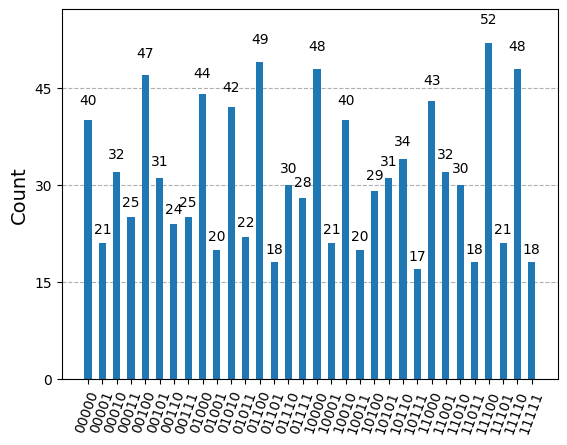

In [66]:
'''Plot results'''
print(counts)
plot_histogram(counts)

### Hmm... not a clear signal showing our expected solution...

Let's try optimizing the circuit to run with higher fidelity.
We'll set the 'optimization level to 3' during the transpiling and see if that helps.

In [78]:
qc = QuantumCircuit.from_qasm_str(qasmstr)

# Find the correct two-qubit gate
twoQ_gates = set(['ecr', 'cz', 'cx'])
for gate in backend.basis_gates:
    if gate in twoQ_gates:
        twoQ_gate = gate

circuits = []
for optimization_level in [0,1,2,3]:
    pm = generate_preset_pass_manager(optimization_level, backend=backend, seed_transpiler=0)
    t_qc = pm.run(qc)
    print(f"Two-qubit gates (optimization_level={optimization_level}): ", t_qc.count_ops()[twoQ_gate])
    circuits.append(t_qc)

Two-qubit gates (optimization_level=0):  313
Two-qubit gates (optimization_level=1):  194
Two-qubit gates (optimization_level=2):  153
Two-qubit gates (optimization_level=3):  153


Nice! Transpiling with a higher optimization level (3) reduced the number of two qubit gates by half! The error should be reduced significantly!

In [79]:
with Batch(backend=backend):
    sampler = Sampler()
    job = sampler.run(
        [(circuit) for circuit in circuits],  # sample all three circuits
        shots=1000
    )
    result = job.result()

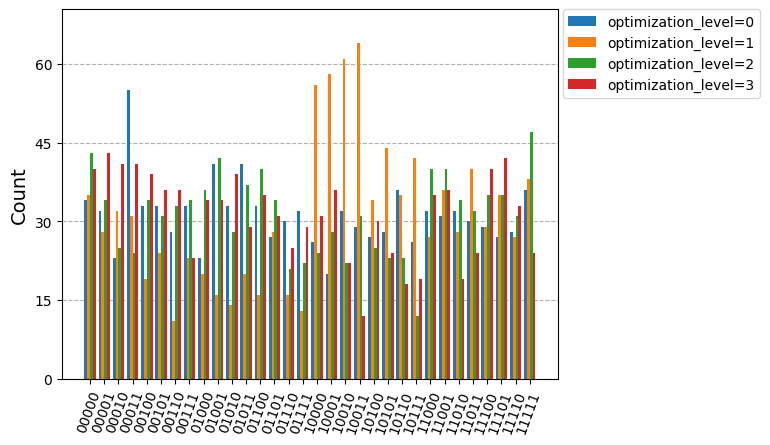

In [81]:
'''Plot results'''
plot_histogram(
    [result[0].data.bc.get_counts(),
     result[1].data.bc.get_counts(),
     result[2].data.bc.get_counts(),
     result[3].data.bc.get_counts()],
    bar_labels=False,
    legend=[
        "optimization_level=0",
        "optimization_level=1",
        "optimization_level=2",
        "optimization_level=3"#,
    ],
)

Hmm.. it's not clear that transpiling optimization helped...
The expected answer (11001) is within the noise...

We can look at all the available cloud backends we could try.


https://quantum.ibm.com/services/resources


https://pypi.org/project/qiskit-ibm-runtime/



However, they all have long queues....

In [83]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

# Display all backends you have access.
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


# Fake qubits

Instead of waiting for a 'real' quantum computer to open up... we can simulate a fake version of a quantum computer into the simulator and use its noise characteristics to simulate the circuit.

In [9]:
# Import the fake backend from the fake provider
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2

# Get a fake backend from the fake provider
backend = FakeGuadalupeV2()

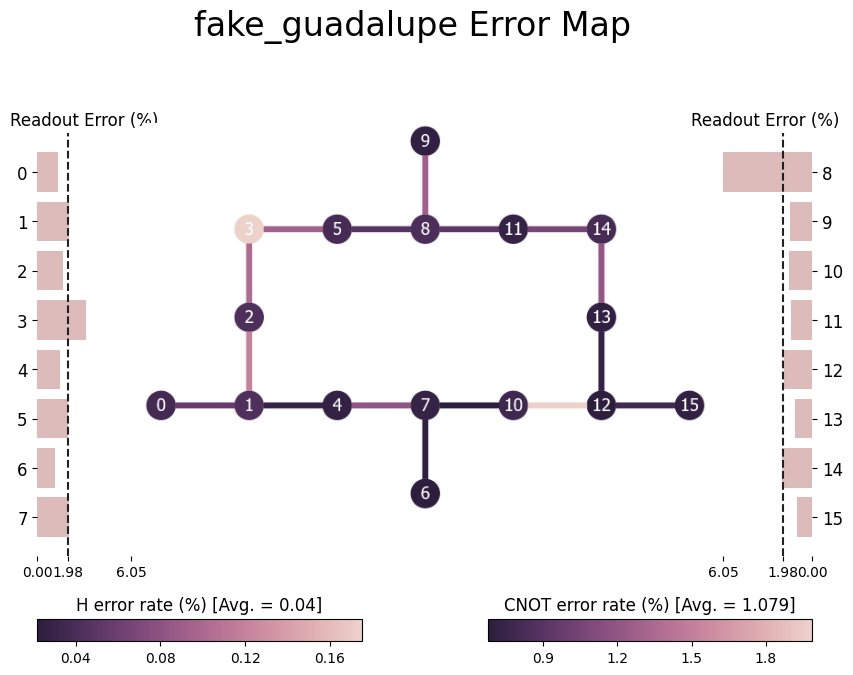

In [15]:
from qiskit.visualization import plot_error_map
plot_error_map(backend, figsize=(10, 8))

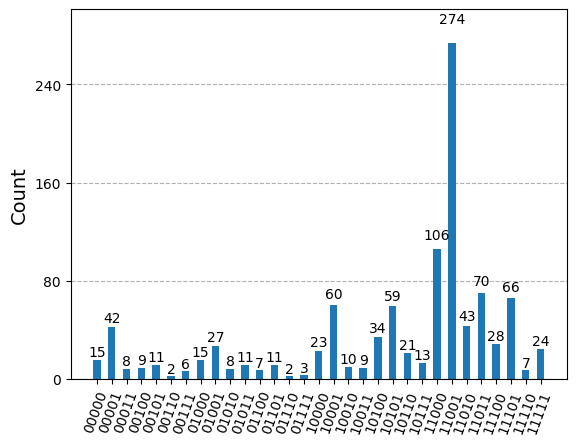

In [ ]:

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(qc, backend)
# transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [85]:
answer = counts.most_frequent()
print( 'Most frequent measured bit string = ' , answer)
print( 'Most frequent measured integer = ' ,int(answer,2))

Most frequent measured bit string =  11001
Most frequent measured integer =  25


# Success!*

The quantum* computer got it right 1/4 of the time! Which is enough to see that it is the most likely answer!

(fake quantum computer*)

# Fake Brisbane

Let's use the fake Brisbane to run the circuit.

First we can plot the two qubit error rate for each pair loading the real Brisbane's error rates

In [93]:
backend = service.backend('ibm_brisbane')
backend.refresh()

In [ ]:
from qiskit.visualization import plot_error_map
plot_error_map(backend)

Name: ibm_brisbane
Version: 2
No. of qubits: 127

ECR Gate Error Rate (1, 0): 0.00369
ECR Gate Error Rate (2, 1): 0.00843
ECR Gate Error Rate (3, 2): 0.01232
ECR Gate Error Rate (4, 3): 0.00558
ECR Gate Error Rate (4, 5): 0.0054
ECR Gate Error Rate (4, 15): 0.00872
ECR Gate Error Rate (6, 5): 0.00634
ECR Gate Error Rate (6, 7): 0.00773
ECR Gate Error Rate (7, 8): 0.00435
ECR Gate Error Rate (8, 9): 0.00751
ECR Gate Error Rate (10, 9): 0.00719
ECR Gate Error Rate (10, 11): 0.0221
ECR Gate Error Rate (11, 12): 0.02475
ECR Gate Error Rate (12, 17): 0.02378
ECR Gate Error Rate (13, 12): 0.02917
ECR Gate Error Rate (14, 0): 0.00459
ECR Gate Error Rate (14, 18): 0.00526
ECR Gate Error Rate (15, 22): 0.00647
ECR Gate Error Rate (16, 8): 0.00884
ECR Gate Error Rate (16, 26): 0.00972
ECR Gate Error Rate (17, 30): 0.02421
ECR Gate Error Rate (18, 19): 0.00848
ECR Gate Error Rate (20, 19): 0.00777
ECR Gate Error Rate (20, 33): 0.04462
ECR Gate Error Rate (21, 20): 0.00777
ECR Gate Error Rate (21,

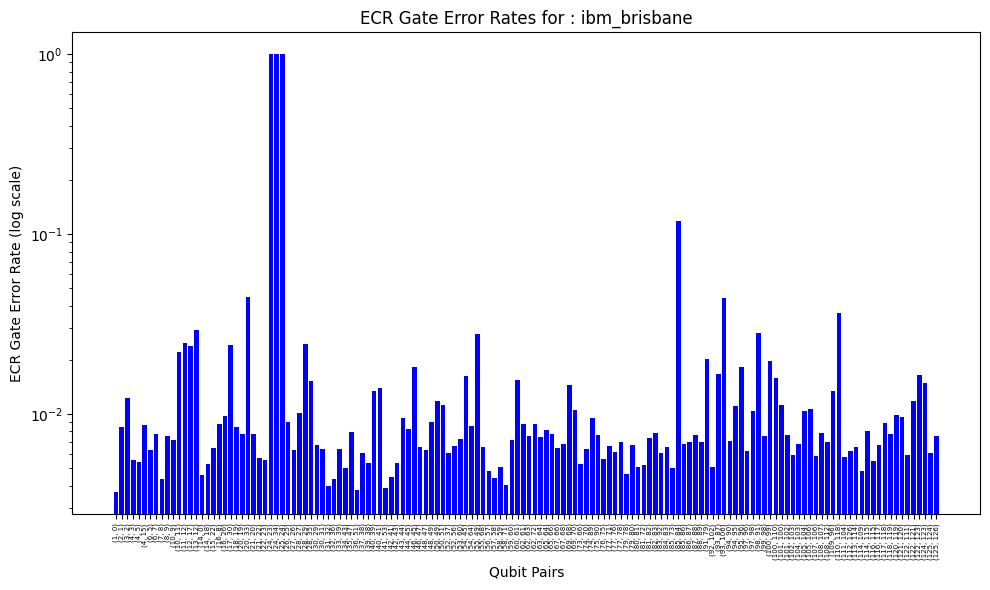

In [92]:
# Plotting 2Q error rates (echo cross resonance gate error)
backend = service.backend('ibm_brisbane')
backend.refresh()

print(f"Name: {backend.name}")
print(f"Version: {backend.version}")
print(f"No. of qubits: {backend.num_qubits}\n")

# Extract ECR gate error rates
error_rates = []
qubit_pairs = []
for qubit1 in range(backend.num_qubits):
    for qubit2 in range(backend.num_qubits):
        if qubit1 != qubit2:
            try:
                error_rate = round(backend.target["ecr"][(qubit1, qubit2)].error,5)
                error_rates.append(error_rate)
                qubit_pairs.append(f"({qubit1}, {qubit2})")
                print(f"ECR Gate Error Rate ({qubit1}, {qubit2}): {error_rate}")
            except KeyError:
                pass

# Plotting the ECR gate error rates
plt.figure(figsize=(10, 6))
plt.bar(qubit_pairs, error_rates, color='blue')
plt.yscale('log')
plt.xlabel("Qubit Pairs")
plt.ylabel("ECR Gate Error Rate (log scale)")
plt.title(f"ECR Gate Error Rates for : {backend.name}")
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.show()

## Run the circuit on Fake Brisbane

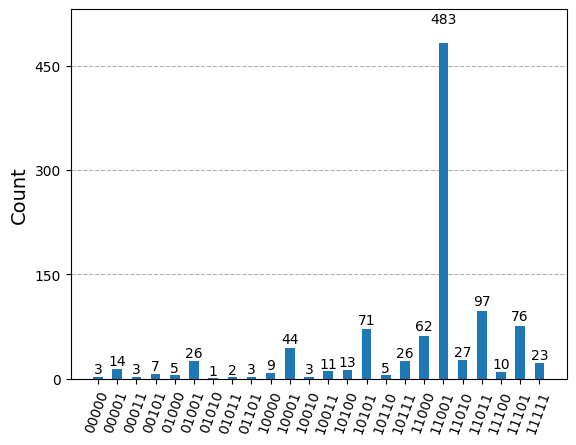

In [86]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
 
# initialize service to access real backends
service = QiskitRuntimeService()
 
# call refresh to retrieve latest backend data
# note that this overwrites your local qiskit-ibm-runtime files
backend = FakeBrisbane()
backend.refresh(service)


# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(qc, backend)
# transpiled_circuit.draw('mpl', style="iqp")

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

### Fake Brisbane works!

# Transpiling Optimization

Lets repeat the transpiling optimization on the fake QPU to see if it helps

In [87]:
qc = QuantumCircuit.from_qasm_str(qasmstr)

backend = FakeBrisbane()


circuits = []
for optimization_level in [0,1,2,3]:
    pm = generate_preset_pass_manager(optimization_level, backend=backend, seed_transpiler=0)
    t_qc = pm.run(qc)
    print(f"Two-qubit gates (optimization_level={optimization_level}): ", t_qc.count_ops()[twoQ_gate])
    circuits.append(t_qc)

Two-qubit gates (optimization_level=0):  313
Two-qubit gates (optimization_level=1):  194
Two-qubit gates (optimization_level=2):  153
Two-qubit gates (optimization_level=3):  153


In [88]:
with Batch(backend=backend):
    sampler = Sampler()
    job = sampler.run(
        [(circuit) for circuit in circuits],  # sample all three circuits
        shots=1000
    )
    result = job.result()

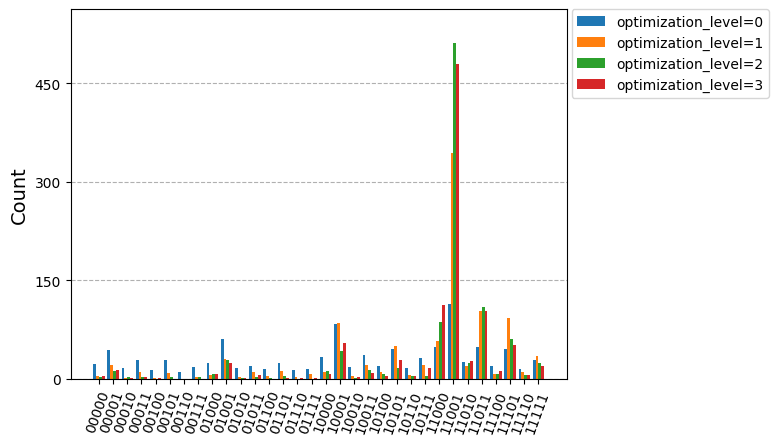

In [89]:
'''Plot results'''
plot_histogram(
    [result[0].data.bc.get_counts(),
     result[1].data.bc.get_counts(),
     result[2].data.bc.get_counts(),
     result[3].data.bc.get_counts()],
    bar_labels=False,
    legend=[
        "optimization_level=0",
        "optimization_level=1",
        "optimization_level=2",
        "optimization_level=3"#,
    ],
)

### Transpiling optimization helps! 
Optimization level 1 is much better than 0, and 2 is actually better than 3 slightly.

### Now you're ready to run your own quantum algorithms with simulations or on the cloud!

# Homework 7  
> (due 3/31/2025 at noon)

1. Create a new notebook just for the problem set
1. Work with a partner or group of three to solve the problems
1. Summarize your results in a short report and upload to gradescope
1. Include a link to your colab notebook code 
1. Make sure the link gives 'General access' for 'Anyone with the link' to comment (and view)


# Problems

1. Show that the quantum sum and carry circuit works by inputing a=1, b=1, cin=1 and showing the output.

1. Decompose a single Toffoli gate into bare CNOT gates and single qubit gates.

    a. How many CNOT gates are required? 

    b. How many single qubit gates are required?

1. How much error does a single Toffoli gate accumulate if it is run with CNOT gates with 1% error each and single qubit gates with 0.1% error each?

1. How does this error expand if qubits are distant on the coupling map of the quantum processor? That is, how many more CNOT gates are needed for qubits that are connected via two additional intermediate qubits? (Like qubit 1 and qubit 10 on the ibmq_brisbane processor)?

1. Are any entangled states created by the quantum adder circuit? Why or why not?

1. Create a quantum adder circuit that works for 5 bit inputs a and b.
  
   a. Run the 5 bit quantum adder using a unitary simulator like Aer_simulator with no noise to verify the circuit works.

   b. Run the 5 bit quantum adder using noise from a fake IBM QPU. Do you get the correct answer? 

1. BONUS: What is the largest number that can be added using IBM QPUs? 


In [ ]:
'''
Exercise 1
'''


In [ ]:
'''
Exercise 2
'''
